# Sommaire

>[Sommaire](#scrollTo=OXXSgYy9BBec)

>[Imports et paramètres généraux](#scrollTo=zC7YhIrj59gy)

>[Création des modèles à entraîner](#scrollTo=gZFVwEW96EaG)

>[Fonctions d'affichages et d'enregistrements](#scrollTo=m_Wx43PK6pdE)

>[Entraînement](#scrollTo=5CAxdPTM6wkq)

>[Téléchargements](#scrollTo=4QJiqfKLBU_W)



# Imports et paramètres généraux

Imports des librairies principales et réglage des paramètres d'aléa

In [13]:
!pip install tqdm

# gestions relatives aux fichiers de manière générale
import os

# choix de tensorflow comme backend de Keras
os.environ["KERAS_BACKEND"] = "tensorflow"

# opérations matricielles
import numpy as np

from tqdm import tqdm

# affichages
import matplotlib.pyplot as plt

# les différentes parties utilisées de Keras
from keras.layers import Input
from keras.models import Model, Sequential
from keras.layers.core import Reshape, Dense, Dropout, Flatten
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Convolution2D, UpSampling2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras import backend as K
from keras import initializers

K.set_image_dim_ordering('th')

# on fixe le seed du random de numpy pour avoir des résultats reproductibles
np.random.seed(1000)

# On choisit la taille du vecteur aléatoire d'entrée du GAN
# 10 marche bien pour MNIST d'après la littérature
randomDim = 10

Chargement du dataset

In [0]:
# Chargement directement depuis Keras
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalisation des données
X_train = (X_train.astype(np.float32) - 127.5)/127.5

# Mise en forme des données d'entraînement
X_train = X_train.reshape(60000, 784)

# Création des modèles à entraîner

Configuration du Générateur

In [0]:
# Architecture trouvée dans la littérature, marche bien pour MNIST
generator = Sequential()
generator.add(Dense(256, input_dim=randomDim, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
generator.add(LeakyReLU(0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
generator.add(Dense(784, activation='tanh'))
generator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))

Configuration du Discriminateur

In [0]:
# Architecture trouvée dans la littérature, marche bien pour MNIST
discriminator = Sequential()
discriminator.add(Dense(1024, input_dim=784, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(512))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))

Configuration du GAN comme assemblage du Générateur et du Discriminateur

In [0]:
discriminator.trainable = False
ganInput = Input(shape=(randomDim,))
x = generator(ganInput)
ganOutput = discriminator(x)
gan = Model(inputs=ganInput, outputs=ganOutput)
gan.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))

# Fonctions d'affichages et d'enregistrements

In [0]:
# Affichage de la fonction de coût
def plotLoss(epoch):
    plt.figure(figsize=(10, 8))
    plt.plot(dLosses, label='Discriminitive loss')
    plt.plot(gLosses, label='Generative loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig('gan_loss_epoch_%d.png' % epoch)

# Affichage d'une mosaïque d'images générées par le Générateur
def plotGeneratedImages(epoch, examples=100, dim=(10, 10), figsize=(10, 10)):
    noise = np.random.normal(0, 1, size=[examples, randomDim])
    generatedImages = generator.predict(noise)
    generatedImages = generatedImages.reshape(examples, 28, 28)

    plt.figure(figsize=figsize)
    for i in range(generatedImages.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generatedImages[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('gan_generated_image_epoch_%d.png' % epoch)

In [0]:
# sauvegarde des réseaux de neurones
def saveModels(epoch):
    generator.save('gan_generator_epoch_%d.h5' % epoch)
    discriminator.save('gan_discriminator_epoch_%d.h5' % epoch)

# Entraînement

  0%|          | 0/468 [00:00<?, ?it/s]

Epochs: 300
Batch size: 128
Batches per epoch: 468
--------------- Epoch 1 ---------------


  1%|          | 4/468 [00:00<00:14, 32.75it/s]

--------------- Epoch 2 ---------------


  1%|          | 4/468 [00:00<00:12, 35.84it/s]

--------------- Epoch 3 ---------------


  1%|          | 4/468 [00:00<00:12, 36.36it/s]

--------------- Epoch 4 ---------------


  1%|          | 4/468 [00:00<00:12, 36.28it/s]

--------------- Epoch 5 ---------------


  1%|          | 4/468 [00:00<00:13, 33.89it/s]

--------------- Epoch 6 ---------------


  1%|          | 4/468 [00:00<00:13, 34.94it/s]

--------------- Epoch 7 ---------------


  1%|          | 4/468 [00:00<00:13, 34.85it/s]

--------------- Epoch 8 ---------------


  1%|          | 4/468 [00:00<00:13, 35.14it/s]

--------------- Epoch 9 ---------------


  1%|          | 4/468 [00:00<00:12, 36.25it/s]

--------------- Epoch 10 ---------------


  1%|          | 4/468 [00:00<00:12, 35.95it/s]

--------------- Epoch 11 ---------------


  1%|          | 4/468 [00:00<00:13, 35.29it/s]

--------------- Epoch 12 ---------------


  1%|          | 4/468 [00:00<00:12, 36.50it/s]

--------------- Epoch 13 ---------------


  1%|          | 4/468 [00:00<00:13, 33.58it/s]

--------------- Epoch 14 ---------------


  1%|          | 4/468 [00:00<00:13, 35.50it/s]

--------------- Epoch 15 ---------------


  1%|          | 4/468 [00:00<00:13, 35.17it/s]

--------------- Epoch 16 ---------------


  1%|          | 4/468 [00:00<00:13, 33.77it/s]

--------------- Epoch 17 ---------------


  1%|          | 4/468 [00:00<00:13, 33.72it/s]

--------------- Epoch 18 ---------------


  1%|          | 4/468 [00:00<00:13, 34.52it/s]

--------------- Epoch 19 ---------------


  1%|          | 4/468 [00:00<00:12, 35.87it/s]

--------------- Epoch 20 ---------------


  1%|          | 4/468 [00:00<00:13, 33.53it/s]

--------------- Epoch 21 ---------------


  1%|          | 4/468 [00:00<00:12, 35.85it/s]

--------------- Epoch 22 ---------------


  1%|          | 4/468 [00:00<00:13, 34.73it/s]

--------------- Epoch 23 ---------------


  1%|          | 4/468 [00:00<00:14, 32.03it/s]

--------------- Epoch 24 ---------------


  1%|          | 4/468 [00:00<00:13, 34.40it/s]

--------------- Epoch 25 ---------------


  1%|          | 4/468 [00:00<00:13, 34.39it/s]

--------------- Epoch 26 ---------------


  1%|          | 4/468 [00:00<00:12, 36.33it/s]

--------------- Epoch 27 ---------------


  1%|          | 4/468 [00:00<00:13, 34.43it/s]

--------------- Epoch 28 ---------------


  1%|          | 4/468 [00:00<00:13, 35.10it/s]

--------------- Epoch 29 ---------------


  1%|          | 4/468 [00:00<00:12, 37.25it/s]

--------------- Epoch 30 ---------------


  1%|          | 4/468 [00:00<00:13, 33.39it/s]

--------------- Epoch 31 ---------------


  1%|          | 4/468 [00:00<00:12, 36.46it/s]

--------------- Epoch 32 ---------------


  1%|          | 4/468 [00:00<00:14, 32.47it/s]

--------------- Epoch 33 ---------------


  1%|          | 4/468 [00:00<00:12, 36.00it/s]

--------------- Epoch 34 ---------------


  1%|          | 4/468 [00:00<00:13, 33.83it/s]

--------------- Epoch 35 ---------------


  1%|          | 4/468 [00:00<00:13, 35.66it/s]

--------------- Epoch 36 ---------------


  1%|          | 4/468 [00:00<00:12, 35.85it/s]

--------------- Epoch 37 ---------------


  1%|          | 4/468 [00:00<00:13, 35.17it/s]

--------------- Epoch 38 ---------------


  1%|          | 4/468 [00:00<00:12, 36.14it/s]

--------------- Epoch 39 ---------------


  1%|          | 4/468 [00:00<00:13, 35.62it/s]

--------------- Epoch 40 ---------------


  1%|          | 4/468 [00:00<00:13, 35.59it/s]

--------------- Epoch 41 ---------------


  1%|          | 4/468 [00:00<00:12, 36.87it/s]

--------------- Epoch 42 ---------------


  1%|          | 4/468 [00:00<00:14, 32.31it/s]

--------------- Epoch 43 ---------------


  1%|          | 4/468 [00:00<00:13, 35.13it/s]

--------------- Epoch 44 ---------------


  1%|          | 4/468 [00:00<00:13, 34.92it/s]

--------------- Epoch 45 ---------------


  1%|          | 4/468 [00:00<00:13, 34.38it/s]

--------------- Epoch 46 ---------------


  1%|          | 4/468 [00:00<00:12, 35.96it/s]

--------------- Epoch 47 ---------------


  1%|          | 4/468 [00:00<00:13, 34.44it/s]

--------------- Epoch 48 ---------------


  1%|          | 4/468 [00:00<00:13, 33.77it/s]

--------------- Epoch 49 ---------------


  1%|          | 4/468 [00:00<00:12, 36.62it/s]

--------------- Epoch 50 ---------------


  1%|          | 4/468 [00:00<00:13, 35.62it/s]

--------------- Epoch 51 ---------------


  1%|          | 4/468 [00:00<00:13, 34.35it/s]

--------------- Epoch 52 ---------------


  1%|          | 4/468 [00:00<00:13, 34.45it/s]

--------------- Epoch 53 ---------------


  1%|          | 4/468 [00:00<00:13, 33.80it/s]

--------------- Epoch 54 ---------------


  1%|          | 4/468 [00:00<00:13, 35.57it/s]

--------------- Epoch 55 ---------------


  1%|          | 4/468 [00:00<00:12, 36.21it/s]

--------------- Epoch 56 ---------------


  1%|          | 4/468 [00:00<00:12, 37.30it/s]

--------------- Epoch 57 ---------------


  1%|          | 4/468 [00:00<00:13, 33.72it/s]

--------------- Epoch 58 ---------------


  1%|          | 4/468 [00:00<00:12, 36.45it/s]

--------------- Epoch 59 ---------------


  1%|          | 4/468 [00:00<00:13, 34.87it/s]

--------------- Epoch 60 ---------------


  1%|          | 4/468 [00:00<00:13, 34.52it/s]

--------------- Epoch 61 ---------------


  1%|          | 4/468 [00:00<00:13, 35.68it/s]

--------------- Epoch 62 ---------------


  1%|          | 4/468 [00:00<00:12, 36.24it/s]

--------------- Epoch 63 ---------------


  1%|          | 4/468 [00:00<00:13, 35.33it/s]

--------------- Epoch 64 ---------------


  1%|          | 4/468 [00:00<00:13, 33.69it/s]

--------------- Epoch 65 ---------------


  1%|          | 4/468 [00:00<00:13, 33.48it/s]

--------------- Epoch 66 ---------------


  1%|          | 4/468 [00:00<00:13, 34.46it/s]

--------------- Epoch 67 ---------------


  1%|          | 4/468 [00:00<00:13, 35.53it/s]

--------------- Epoch 68 ---------------


  1%|          | 4/468 [00:00<00:12, 36.38it/s]

--------------- Epoch 69 ---------------


  1%|          | 4/468 [00:00<00:13, 34.27it/s]

--------------- Epoch 70 ---------------


  1%|          | 4/468 [00:00<00:13, 34.28it/s]

--------------- Epoch 71 ---------------


  1%|          | 4/468 [00:00<00:12, 36.76it/s]

--------------- Epoch 72 ---------------


  1%|          | 4/468 [00:00<00:13, 33.82it/s]

--------------- Epoch 73 ---------------


  1%|          | 4/468 [00:00<00:12, 36.40it/s]

--------------- Epoch 74 ---------------


  1%|          | 4/468 [00:00<00:13, 35.38it/s]

--------------- Epoch 75 ---------------


  1%|          | 4/468 [00:00<00:13, 34.10it/s]

--------------- Epoch 76 ---------------


  1%|          | 4/468 [00:00<00:13, 35.47it/s]

--------------- Epoch 77 ---------------


  1%|          | 4/468 [00:00<00:12, 36.70it/s]

--------------- Epoch 78 ---------------


  1%|          | 4/468 [00:00<00:13, 35.44it/s]

--------------- Epoch 79 ---------------


  1%|          | 4/468 [00:00<00:13, 35.31it/s]

--------------- Epoch 80 ---------------


  1%|          | 4/468 [00:00<00:13, 34.03it/s]

--------------- Epoch 81 ---------------


  1%|          | 4/468 [00:00<00:13, 34.56it/s]

--------------- Epoch 82 ---------------


  1%|          | 4/468 [00:00<00:12, 36.31it/s]

--------------- Epoch 83 ---------------


  1%|          | 4/468 [00:00<00:13, 34.52it/s]

--------------- Epoch 84 ---------------


  1%|          | 4/468 [00:00<00:13, 34.69it/s]

--------------- Epoch 85 ---------------


  1%|          | 4/468 [00:00<00:12, 36.74it/s]

--------------- Epoch 86 ---------------


  1%|          | 4/468 [00:00<00:13, 34.78it/s]

--------------- Epoch 87 ---------------


  1%|          | 4/468 [00:00<00:13, 34.59it/s]

--------------- Epoch 88 ---------------


  1%|          | 4/468 [00:00<00:12, 36.32it/s]

--------------- Epoch 89 ---------------


  1%|          | 4/468 [00:00<00:13, 34.20it/s]

--------------- Epoch 90 ---------------


  1%|          | 4/468 [00:00<00:12, 36.95it/s]

--------------- Epoch 91 ---------------


  1%|          | 4/468 [00:00<00:12, 37.02it/s]

--------------- Epoch 92 ---------------


  1%|          | 4/468 [00:00<00:13, 35.32it/s]

--------------- Epoch 93 ---------------


  1%|          | 4/468 [00:00<00:13, 35.40it/s]

--------------- Epoch 94 ---------------


  1%|          | 4/468 [00:00<00:12, 36.22it/s]

--------------- Epoch 95 ---------------


  1%|          | 4/468 [00:00<00:13, 33.81it/s]

--------------- Epoch 96 ---------------


  1%|          | 4/468 [00:00<00:12, 36.90it/s]

--------------- Epoch 97 ---------------


  1%|          | 4/468 [00:00<00:12, 35.97it/s]

--------------- Epoch 98 ---------------


  1%|          | 4/468 [00:00<00:12, 36.77it/s]

--------------- Epoch 99 ---------------


  1%|          | 4/468 [00:00<00:13, 34.48it/s]

--------------- Epoch 100 ---------------


  1%|          | 4/468 [00:00<00:13, 34.70it/s]

--------------- Epoch 101 ---------------


  1%|          | 4/468 [00:00<00:13, 35.29it/s]

--------------- Epoch 102 ---------------


  1%|          | 4/468 [00:00<00:12, 36.91it/s]

--------------- Epoch 103 ---------------


  1%|          | 4/468 [00:00<00:12, 36.99it/s]

--------------- Epoch 104 ---------------


  1%|          | 4/468 [00:00<00:14, 33.02it/s]

--------------- Epoch 105 ---------------


  1%|          | 4/468 [00:00<00:12, 36.06it/s]

--------------- Epoch 106 ---------------


  1%|          | 4/468 [00:00<00:12, 36.23it/s]

--------------- Epoch 107 ---------------


  1%|          | 4/468 [00:00<00:13, 33.48it/s]

--------------- Epoch 108 ---------------


  1%|          | 4/468 [00:00<00:13, 34.64it/s]

--------------- Epoch 109 ---------------


  1%|          | 4/468 [00:00<00:13, 35.42it/s]

--------------- Epoch 110 ---------------


  1%|          | 4/468 [00:00<00:13, 33.99it/s]

--------------- Epoch 111 ---------------


  1%|          | 4/468 [00:00<00:13, 34.99it/s]

--------------- Epoch 112 ---------------


  1%|          | 4/468 [00:00<00:13, 34.88it/s]

--------------- Epoch 113 ---------------


  1%|          | 4/468 [00:00<00:13, 35.25it/s]

--------------- Epoch 114 ---------------


  1%|          | 4/468 [00:00<00:13, 35.57it/s]

--------------- Epoch 115 ---------------


  1%|          | 4/468 [00:00<00:12, 36.24it/s]

--------------- Epoch 116 ---------------


  1%|          | 4/468 [00:00<00:13, 33.64it/s]

--------------- Epoch 117 ---------------


  1%|          | 4/468 [00:00<00:13, 35.54it/s]

--------------- Epoch 118 ---------------


  1%|          | 4/468 [00:00<00:13, 35.34it/s]

--------------- Epoch 119 ---------------


  1%|          | 4/468 [00:00<00:13, 35.63it/s]

--------------- Epoch 120 ---------------


  1%|          | 4/468 [00:00<00:13, 34.00it/s]

--------------- Epoch 121 ---------------


  1%|          | 4/468 [00:00<00:14, 32.99it/s]

--------------- Epoch 122 ---------------


  1%|          | 4/468 [00:00<00:13, 34.23it/s]

--------------- Epoch 123 ---------------


  1%|          | 4/468 [00:00<00:13, 33.93it/s]

--------------- Epoch 124 ---------------


  1%|          | 4/468 [00:00<00:13, 33.97it/s]

--------------- Epoch 125 ---------------


  1%|          | 4/468 [00:00<00:13, 35.12it/s]

--------------- Epoch 126 ---------------


  1%|          | 4/468 [00:00<00:12, 35.90it/s]

--------------- Epoch 127 ---------------


  1%|          | 4/468 [00:00<00:13, 34.89it/s]

--------------- Epoch 128 ---------------


  1%|          | 4/468 [00:00<00:13, 33.27it/s]

--------------- Epoch 129 ---------------


  1%|          | 4/468 [00:00<00:13, 34.94it/s]

--------------- Epoch 130 ---------------


  1%|          | 4/468 [00:00<00:13, 33.86it/s]

--------------- Epoch 131 ---------------


  1%|          | 4/468 [00:00<00:13, 34.54it/s]

--------------- Epoch 132 ---------------


  1%|          | 4/468 [00:00<00:12, 36.36it/s]

--------------- Epoch 133 ---------------


  1%|          | 4/468 [00:00<00:13, 33.68it/s]

--------------- Epoch 134 ---------------


  1%|          | 4/468 [00:00<00:13, 34.47it/s]

--------------- Epoch 135 ---------------


  1%|          | 4/468 [00:00<00:12, 36.46it/s]

--------------- Epoch 136 ---------------


  1%|          | 4/468 [00:00<00:13, 34.71it/s]

--------------- Epoch 137 ---------------


  1%|          | 4/468 [00:00<00:14, 31.18it/s]

--------------- Epoch 138 ---------------


  1%|          | 4/468 [00:00<00:13, 34.74it/s]

--------------- Epoch 139 ---------------


  1%|          | 4/468 [00:00<00:13, 34.95it/s]

--------------- Epoch 140 ---------------


  1%|          | 4/468 [00:00<00:14, 32.95it/s]

--------------- Epoch 141 ---------------


  1%|          | 4/468 [00:00<00:13, 34.12it/s]

--------------- Epoch 142 ---------------


  1%|          | 4/468 [00:00<00:12, 35.91it/s]

--------------- Epoch 143 ---------------


  1%|          | 4/468 [00:00<00:12, 36.37it/s]

--------------- Epoch 144 ---------------


  1%|          | 4/468 [00:00<00:12, 36.25it/s]

--------------- Epoch 145 ---------------


  1%|          | 4/468 [00:00<00:12, 36.26it/s]

--------------- Epoch 146 ---------------


  1%|          | 4/468 [00:00<00:13, 34.22it/s]

--------------- Epoch 147 ---------------


  1%|          | 4/468 [00:00<00:13, 34.64it/s]

--------------- Epoch 148 ---------------


  1%|          | 4/468 [00:00<00:13, 35.13it/s]

--------------- Epoch 149 ---------------


  1%|          | 4/468 [00:00<00:13, 34.66it/s]

--------------- Epoch 150 ---------------


  1%|          | 4/468 [00:00<00:13, 34.34it/s]

--------------- Epoch 151 ---------------


  1%|          | 4/468 [00:00<00:13, 35.05it/s]

--------------- Epoch 152 ---------------


  1%|          | 4/468 [00:00<00:13, 35.48it/s]

--------------- Epoch 153 ---------------


  1%|          | 4/468 [00:00<00:13, 35.67it/s]

--------------- Epoch 154 ---------------


  1%|          | 4/468 [00:00<00:13, 35.48it/s]

--------------- Epoch 155 ---------------


  1%|          | 4/468 [00:00<00:13, 34.43it/s]

--------------- Epoch 156 ---------------


  1%|          | 4/468 [00:00<00:13, 34.11it/s]

--------------- Epoch 157 ---------------


  1%|          | 4/468 [00:00<00:13, 34.16it/s]

--------------- Epoch 158 ---------------


  1%|          | 4/468 [00:00<00:13, 35.34it/s]

--------------- Epoch 159 ---------------


  1%|          | 4/468 [00:00<00:13, 33.75it/s]

--------------- Epoch 160 ---------------


  1%|          | 4/468 [00:00<00:14, 32.33it/s]

--------------- Epoch 161 ---------------


  1%|          | 4/468 [00:00<00:12, 36.49it/s]

--------------- Epoch 162 ---------------


  1%|          | 4/468 [00:00<00:12, 36.47it/s]

--------------- Epoch 163 ---------------


  1%|          | 4/468 [00:00<00:13, 34.80it/s]

--------------- Epoch 164 ---------------


  1%|          | 4/468 [00:00<00:12, 35.91it/s]

--------------- Epoch 165 ---------------


  1%|          | 4/468 [00:00<00:13, 35.53it/s]

--------------- Epoch 166 ---------------


  1%|          | 4/468 [00:00<00:12, 36.10it/s]

--------------- Epoch 167 ---------------


  1%|          | 4/468 [00:00<00:12, 37.78it/s]

--------------- Epoch 168 ---------------


  1%|          | 4/468 [00:00<00:12, 37.06it/s]

--------------- Epoch 169 ---------------


  1%|          | 4/468 [00:00<00:13, 33.29it/s]

--------------- Epoch 170 ---------------


  1%|          | 4/468 [00:00<00:13, 33.92it/s]

--------------- Epoch 171 ---------------


  1%|          | 4/468 [00:00<00:13, 33.46it/s]

--------------- Epoch 172 ---------------


  1%|          | 4/468 [00:00<00:13, 34.82it/s]

--------------- Epoch 173 ---------------


  1%|          | 4/468 [00:00<00:13, 34.49it/s]

--------------- Epoch 174 ---------------


  1%|          | 4/468 [00:00<00:13, 34.23it/s]

--------------- Epoch 175 ---------------


  1%|          | 4/468 [00:00<00:13, 33.56it/s]

--------------- Epoch 176 ---------------


  1%|          | 4/468 [00:00<00:12, 36.77it/s]

--------------- Epoch 177 ---------------


  1%|          | 4/468 [00:00<00:13, 35.50it/s]

--------------- Epoch 178 ---------------


  1%|          | 4/468 [00:00<00:13, 34.90it/s]

--------------- Epoch 179 ---------------


  1%|          | 4/468 [00:00<00:12, 37.41it/s]

--------------- Epoch 180 ---------------


  1%|          | 4/468 [00:00<00:13, 34.43it/s]

--------------- Epoch 181 ---------------


  1%|          | 4/468 [00:00<00:13, 34.22it/s]

--------------- Epoch 182 ---------------


  1%|          | 4/468 [00:00<00:12, 37.15it/s]

--------------- Epoch 183 ---------------


  1%|          | 4/468 [00:00<00:13, 33.22it/s]

--------------- Epoch 184 ---------------


  1%|          | 4/468 [00:00<00:12, 36.47it/s]

--------------- Epoch 185 ---------------


  1%|          | 4/468 [00:00<00:13, 35.44it/s]

--------------- Epoch 186 ---------------


  1%|          | 4/468 [00:00<00:13, 34.40it/s]

--------------- Epoch 187 ---------------


  1%|          | 4/468 [00:00<00:12, 35.78it/s]

--------------- Epoch 188 ---------------


  1%|          | 4/468 [00:00<00:13, 33.70it/s]

--------------- Epoch 189 ---------------


  1%|          | 4/468 [00:00<00:13, 35.08it/s]

--------------- Epoch 190 ---------------


  1%|          | 4/468 [00:00<00:13, 34.91it/s]

--------------- Epoch 191 ---------------


  1%|          | 4/468 [00:00<00:12, 37.07it/s]

--------------- Epoch 192 ---------------


  1%|          | 4/468 [00:00<00:12, 36.86it/s]

--------------- Epoch 193 ---------------


  1%|          | 4/468 [00:00<00:13, 35.21it/s]

--------------- Epoch 194 ---------------


  1%|          | 4/468 [00:00<00:13, 33.28it/s]

--------------- Epoch 195 ---------------


  1%|          | 4/468 [00:00<00:12, 36.15it/s]

--------------- Epoch 196 ---------------


  1%|          | 4/468 [00:00<00:14, 32.43it/s]

--------------- Epoch 197 ---------------


  1%|          | 4/468 [00:00<00:12, 36.22it/s]

--------------- Epoch 198 ---------------


  1%|          | 4/468 [00:00<00:13, 35.30it/s]

--------------- Epoch 199 ---------------


  1%|          | 4/468 [00:00<00:12, 36.02it/s]

--------------- Epoch 200 ---------------


  1%|          | 4/468 [00:00<00:13, 33.62it/s]

--------------- Epoch 201 ---------------


  1%|          | 4/468 [00:00<00:13, 35.48it/s]

--------------- Epoch 202 ---------------


  1%|          | 4/468 [00:00<00:12, 36.53it/s]

--------------- Epoch 203 ---------------


  1%|          | 4/468 [00:00<00:13, 35.06it/s]

--------------- Epoch 204 ---------------


  1%|          | 4/468 [00:00<00:13, 33.89it/s]

--------------- Epoch 205 ---------------


  1%|          | 4/468 [00:00<00:13, 34.32it/s]

--------------- Epoch 206 ---------------


  1%|          | 4/468 [00:00<00:12, 36.05it/s]

--------------- Epoch 207 ---------------


  1%|          | 4/468 [00:00<00:12, 36.29it/s]

--------------- Epoch 208 ---------------


  1%|          | 4/468 [00:00<00:14, 32.52it/s]

--------------- Epoch 209 ---------------


  1%|          | 4/468 [00:00<00:13, 34.56it/s]

--------------- Epoch 210 ---------------


  1%|          | 4/468 [00:00<00:12, 36.72it/s]

--------------- Epoch 211 ---------------


  1%|          | 4/468 [00:00<00:13, 34.19it/s]

--------------- Epoch 212 ---------------


  1%|          | 4/468 [00:00<00:13, 34.63it/s]

--------------- Epoch 213 ---------------


  1%|          | 4/468 [00:00<00:13, 34.59it/s]

--------------- Epoch 214 ---------------


  1%|          | 4/468 [00:00<00:12, 36.49it/s]

--------------- Epoch 215 ---------------


  1%|          | 4/468 [00:00<00:13, 33.78it/s]

--------------- Epoch 216 ---------------


  1%|          | 4/468 [00:00<00:12, 36.59it/s]

--------------- Epoch 217 ---------------


  1%|          | 4/468 [00:00<00:13, 35.26it/s]

--------------- Epoch 218 ---------------


  1%|          | 4/468 [00:00<00:13, 34.67it/s]

--------------- Epoch 219 ---------------


  1%|          | 4/468 [00:00<00:13, 33.99it/s]

--------------- Epoch 220 ---------------


  1%|          | 4/468 [00:00<00:13, 34.22it/s]

--------------- Epoch 221 ---------------


  1%|          | 4/468 [00:00<00:12, 35.78it/s]

--------------- Epoch 222 ---------------


  1%|          | 4/468 [00:00<00:12, 36.07it/s]

--------------- Epoch 223 ---------------


  1%|          | 4/468 [00:00<00:13, 35.29it/s]

--------------- Epoch 224 ---------------


  1%|          | 4/468 [00:00<00:12, 35.90it/s]

--------------- Epoch 225 ---------------


  1%|          | 4/468 [00:00<00:12, 37.26it/s]

--------------- Epoch 226 ---------------


  1%|          | 4/468 [00:00<00:14, 32.90it/s]

--------------- Epoch 227 ---------------


  1%|          | 4/468 [00:00<00:12, 36.76it/s]

--------------- Epoch 228 ---------------


  1%|          | 4/468 [00:00<00:12, 36.84it/s]

--------------- Epoch 229 ---------------


  1%|          | 4/468 [00:00<00:13, 35.39it/s]

--------------- Epoch 230 ---------------


  1%|          | 4/468 [00:00<00:12, 36.25it/s]

--------------- Epoch 231 ---------------


  1%|          | 4/468 [00:00<00:13, 34.53it/s]

--------------- Epoch 232 ---------------


  1%|          | 4/468 [00:00<00:13, 34.40it/s]

--------------- Epoch 233 ---------------


  1%|          | 4/468 [00:00<00:13, 33.95it/s]

--------------- Epoch 234 ---------------


  1%|          | 4/468 [00:00<00:13, 34.10it/s]

--------------- Epoch 235 ---------------


  1%|          | 4/468 [00:00<00:13, 34.26it/s]

--------------- Epoch 236 ---------------


  1%|          | 4/468 [00:00<00:13, 35.27it/s]

--------------- Epoch 237 ---------------


  1%|          | 4/468 [00:00<00:13, 35.56it/s]

--------------- Epoch 238 ---------------


  1%|          | 4/468 [00:00<00:13, 35.11it/s]

--------------- Epoch 239 ---------------


  1%|          | 4/468 [00:00<00:12, 36.13it/s]

--------------- Epoch 240 ---------------


  1%|          | 4/468 [00:00<00:14, 32.55it/s]

--------------- Epoch 241 ---------------


  1%|          | 4/468 [00:00<00:12, 35.98it/s]

--------------- Epoch 242 ---------------


  1%|          | 4/468 [00:00<00:13, 34.79it/s]

--------------- Epoch 243 ---------------


  1%|          | 4/468 [00:00<00:13, 35.12it/s]

--------------- Epoch 244 ---------------


  1%|          | 4/468 [00:00<00:13, 33.58it/s]

--------------- Epoch 245 ---------------


  1%|          | 4/468 [00:00<00:12, 37.08it/s]

--------------- Epoch 246 ---------------


  1%|          | 4/468 [00:00<00:13, 34.18it/s]

--------------- Epoch 247 ---------------


  1%|          | 4/468 [00:00<00:13, 33.88it/s]

--------------- Epoch 248 ---------------


  1%|          | 4/468 [00:00<00:13, 35.66it/s]

--------------- Epoch 249 ---------------


  1%|          | 4/468 [00:00<00:13, 34.27it/s]

--------------- Epoch 250 ---------------


  1%|          | 4/468 [00:00<00:13, 33.88it/s]

--------------- Epoch 251 ---------------


  1%|          | 4/468 [00:00<00:12, 36.26it/s]

--------------- Epoch 252 ---------------


  1%|          | 4/468 [00:00<00:13, 35.25it/s]

--------------- Epoch 253 ---------------


  1%|          | 4/468 [00:00<00:12, 37.55it/s]

--------------- Epoch 254 ---------------


  1%|          | 4/468 [00:00<00:14, 32.78it/s]

--------------- Epoch 255 ---------------


  1%|          | 4/468 [00:00<00:12, 36.53it/s]

--------------- Epoch 256 ---------------


  1%|          | 4/468 [00:00<00:13, 34.98it/s]

--------------- Epoch 257 ---------------


  1%|          | 4/468 [00:00<00:13, 34.56it/s]

--------------- Epoch 258 ---------------


  1%|          | 4/468 [00:00<00:13, 33.94it/s]

--------------- Epoch 259 ---------------


  1%|          | 4/468 [00:00<00:13, 34.68it/s]

--------------- Epoch 260 ---------------


  1%|          | 4/468 [00:00<00:13, 33.83it/s]

--------------- Epoch 261 ---------------


  1%|          | 4/468 [00:00<00:13, 34.72it/s]

--------------- Epoch 262 ---------------


  1%|          | 4/468 [00:00<00:12, 36.46it/s]

--------------- Epoch 263 ---------------


  1%|          | 4/468 [00:00<00:13, 34.53it/s]

--------------- Epoch 264 ---------------


  1%|          | 4/468 [00:00<00:12, 36.46it/s]

--------------- Epoch 265 ---------------


  1%|          | 4/468 [00:00<00:13, 33.83it/s]

--------------- Epoch 266 ---------------


  1%|          | 4/468 [00:00<00:13, 35.25it/s]

--------------- Epoch 267 ---------------


  1%|          | 4/468 [00:00<00:14, 32.68it/s]

--------------- Epoch 268 ---------------


  1%|          | 4/468 [00:00<00:12, 36.35it/s]

--------------- Epoch 269 ---------------


  1%|          | 4/468 [00:00<00:12, 36.76it/s]

--------------- Epoch 270 ---------------


  1%|          | 4/468 [00:00<00:12, 36.31it/s]

--------------- Epoch 271 ---------------


  1%|          | 4/468 [00:00<00:13, 35.09it/s]

--------------- Epoch 272 ---------------


  1%|          | 4/468 [00:00<00:12, 36.26it/s]

--------------- Epoch 273 ---------------


  1%|          | 4/468 [00:00<00:13, 34.34it/s]

--------------- Epoch 274 ---------------


  1%|          | 4/468 [00:00<00:13, 34.77it/s]

--------------- Epoch 275 ---------------


  1%|          | 4/468 [00:00<00:13, 33.82it/s]

--------------- Epoch 276 ---------------


  1%|          | 4/468 [00:00<00:13, 34.46it/s]

--------------- Epoch 277 ---------------


  1%|          | 4/468 [00:00<00:13, 35.29it/s]

--------------- Epoch 278 ---------------


  1%|          | 4/468 [00:00<00:13, 35.16it/s]

--------------- Epoch 279 ---------------


  1%|          | 4/468 [00:00<00:13, 34.55it/s]

--------------- Epoch 280 ---------------


  1%|          | 4/468 [00:00<00:13, 33.91it/s]

--------------- Epoch 281 ---------------


  1%|          | 4/468 [00:00<00:12, 37.12it/s]

--------------- Epoch 282 ---------------


  1%|          | 4/468 [00:00<00:13, 33.16it/s]

--------------- Epoch 283 ---------------


  1%|          | 4/468 [00:00<00:13, 33.94it/s]

--------------- Epoch 284 ---------------


  1%|          | 4/468 [00:00<00:13, 34.46it/s]

--------------- Epoch 285 ---------------


  1%|          | 4/468 [00:00<00:13, 33.98it/s]

--------------- Epoch 286 ---------------


  1%|          | 4/468 [00:00<00:13, 34.58it/s]

--------------- Epoch 287 ---------------


  1%|          | 4/468 [00:00<00:13, 34.14it/s]

--------------- Epoch 288 ---------------


  1%|          | 4/468 [00:00<00:13, 34.53it/s]

--------------- Epoch 289 ---------------


  1%|          | 4/468 [00:00<00:13, 33.53it/s]

--------------- Epoch 290 ---------------


  1%|          | 4/468 [00:00<00:12, 37.10it/s]

--------------- Epoch 291 ---------------


  1%|          | 4/468 [00:00<00:13, 34.84it/s]

--------------- Epoch 292 ---------------


  1%|          | 4/468 [00:00<00:14, 31.85it/s]

--------------- Epoch 293 ---------------


  1%|          | 4/468 [00:00<00:13, 34.72it/s]

--------------- Epoch 294 ---------------


  1%|          | 4/468 [00:00<00:12, 35.70it/s]

--------------- Epoch 295 ---------------


  1%|          | 4/468 [00:00<00:12, 35.85it/s]

--------------- Epoch 296 ---------------


  1%|          | 4/468 [00:00<00:12, 35.96it/s]

--------------- Epoch 297 ---------------


  1%|          | 4/468 [00:00<00:13, 33.31it/s]

--------------- Epoch 298 ---------------


  1%|          | 4/468 [00:00<00:13, 33.24it/s]

--------------- Epoch 299 ---------------


  1%|          | 4/468 [00:00<00:13, 35.30it/s]

--------------- Epoch 300 ---------------


100%|██████████| 468/468 [00:13<00:00, 34.76it/s]


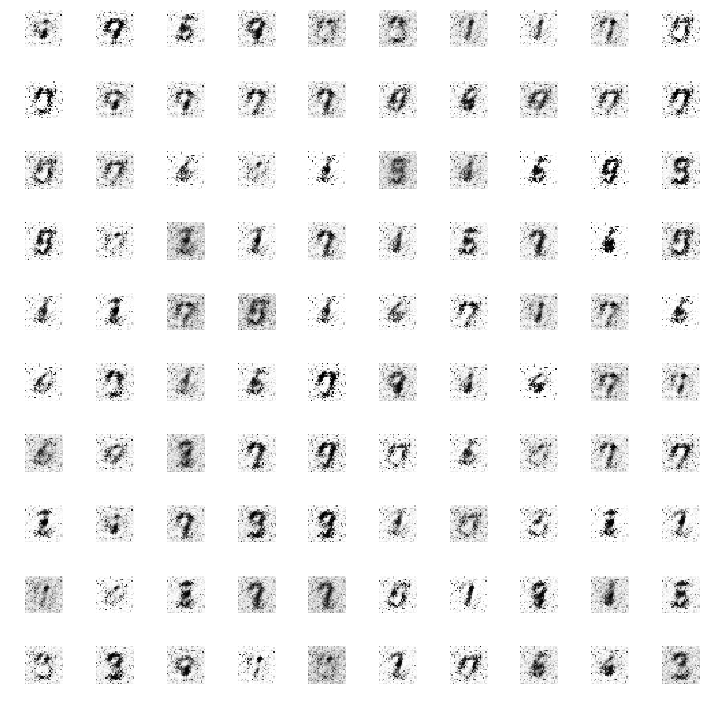

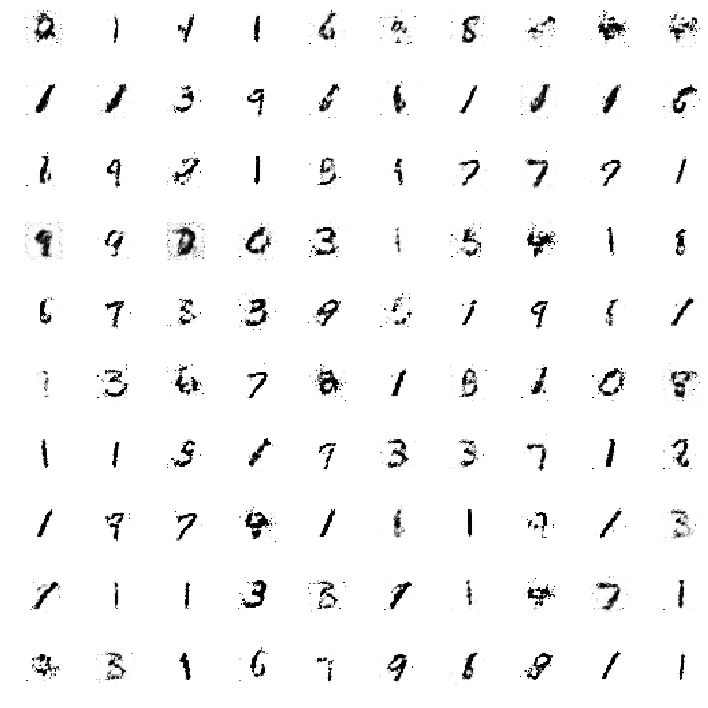

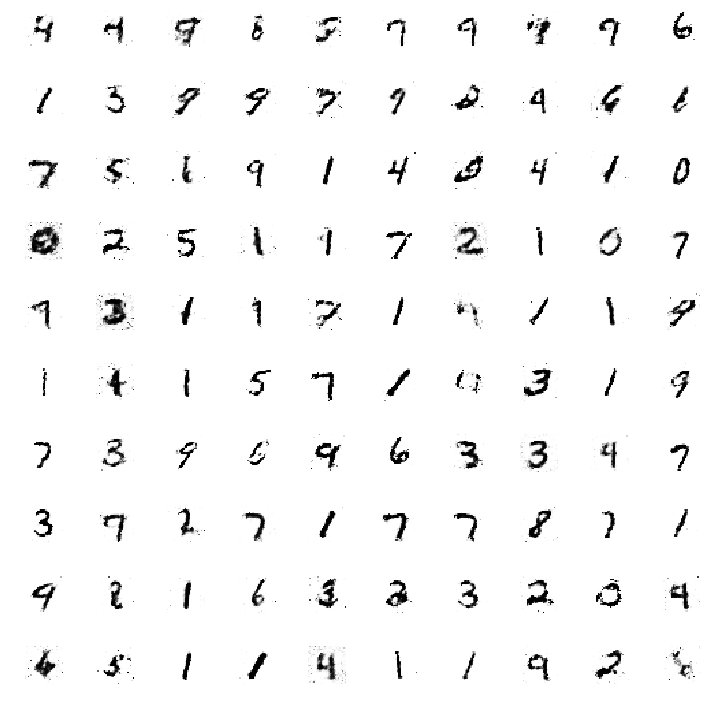

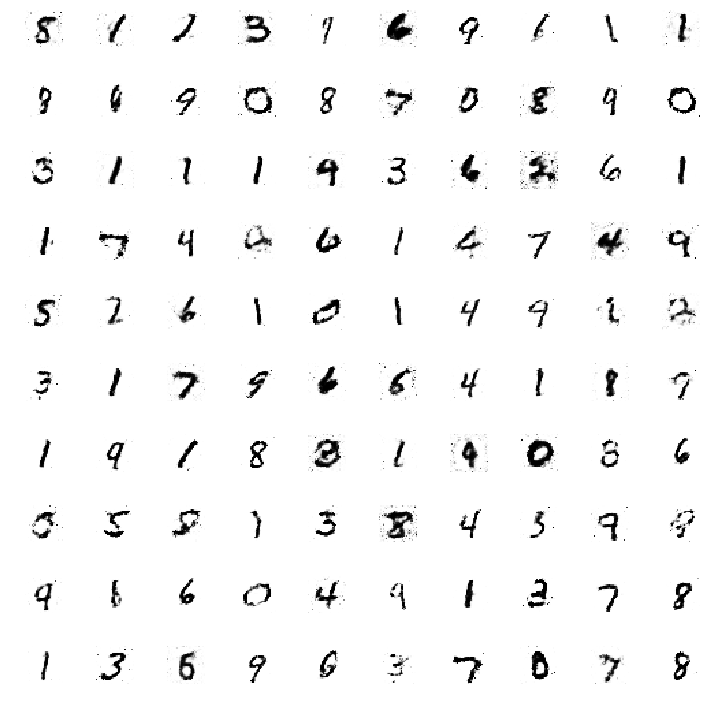

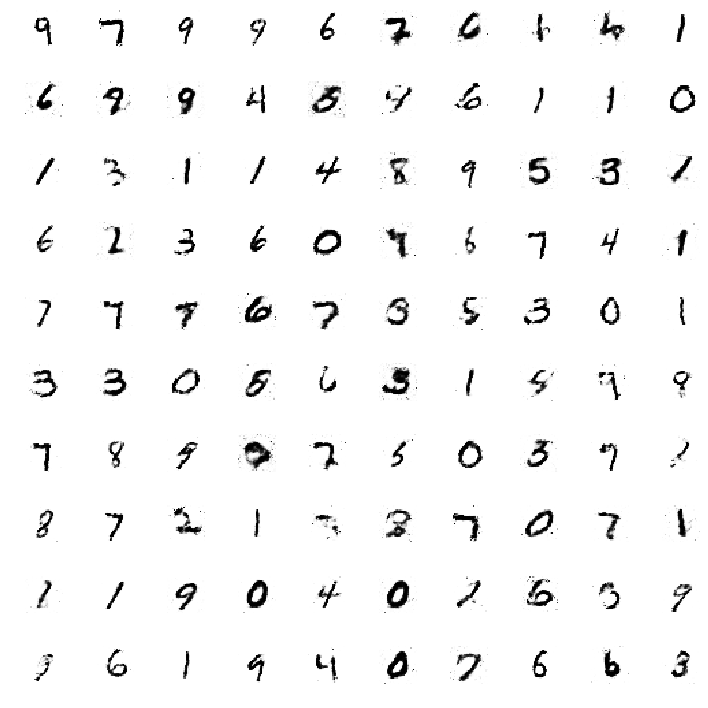

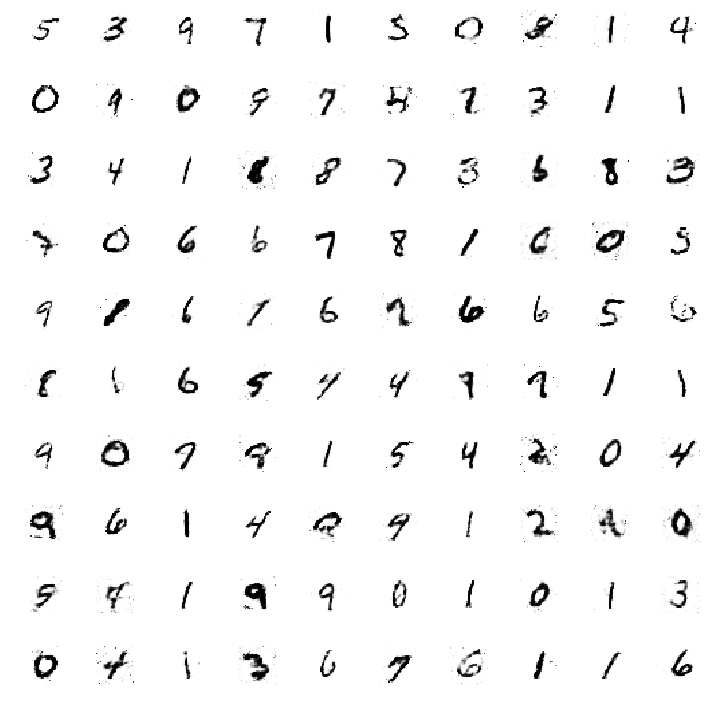

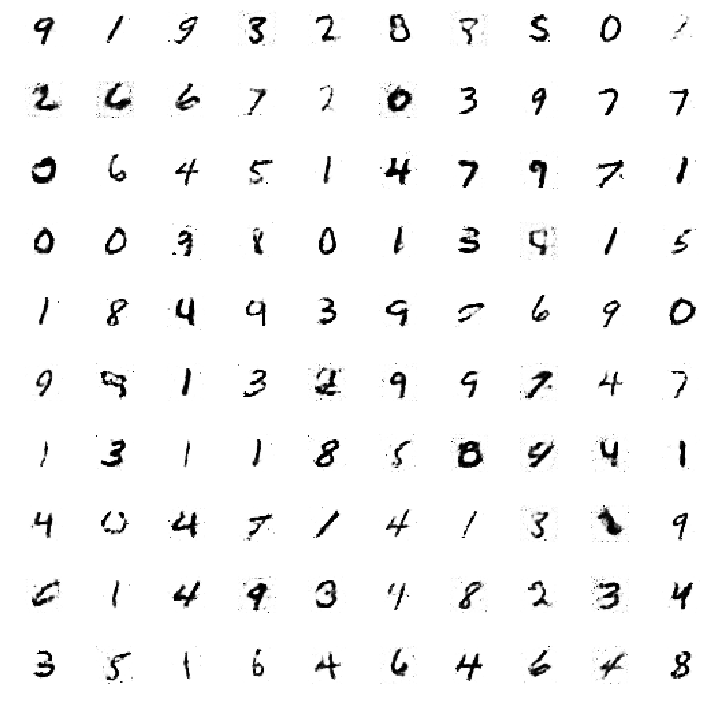

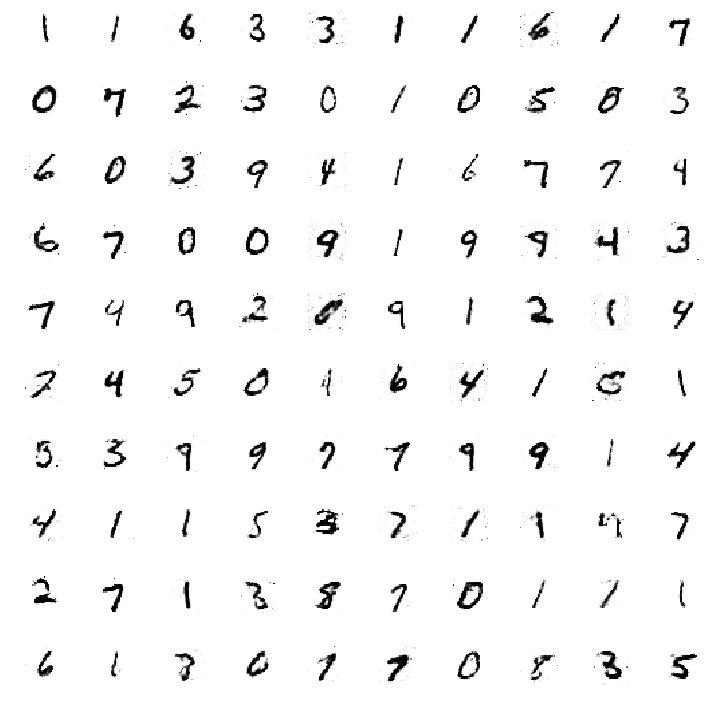

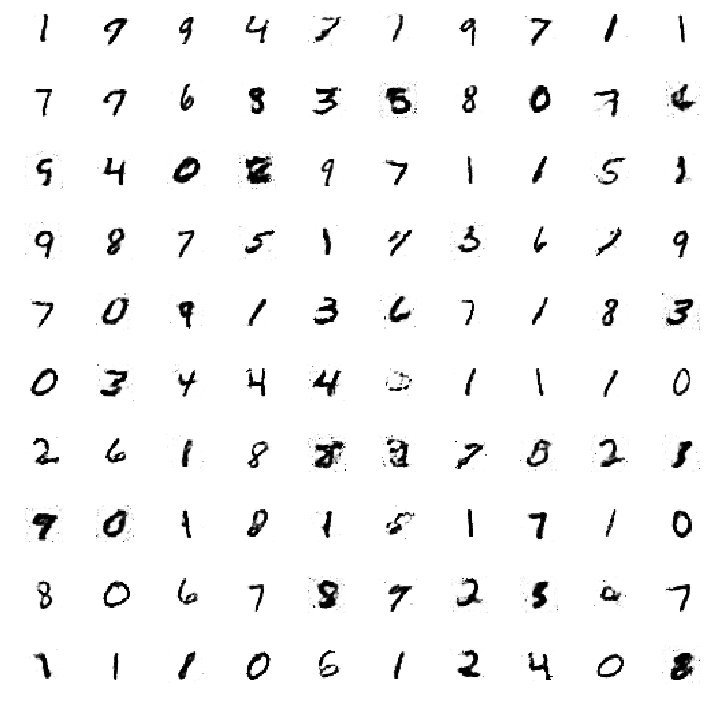

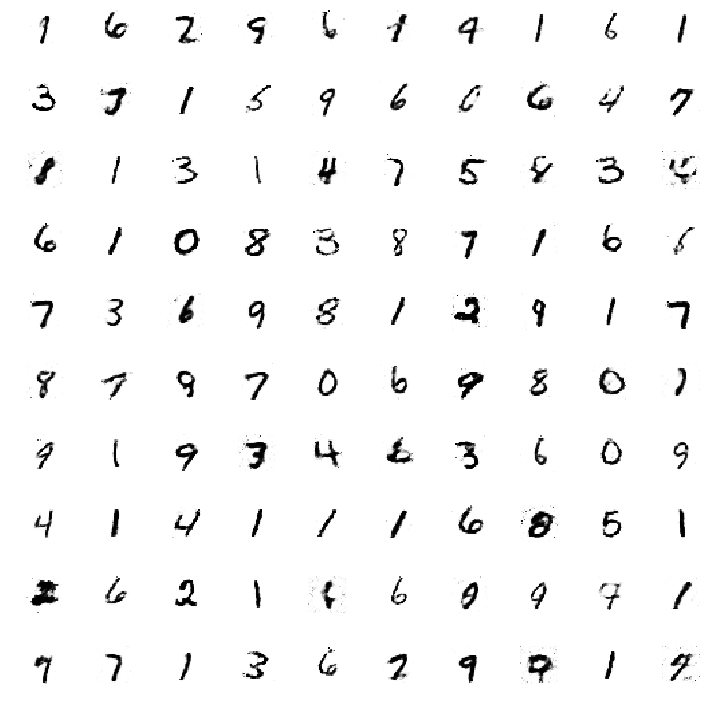

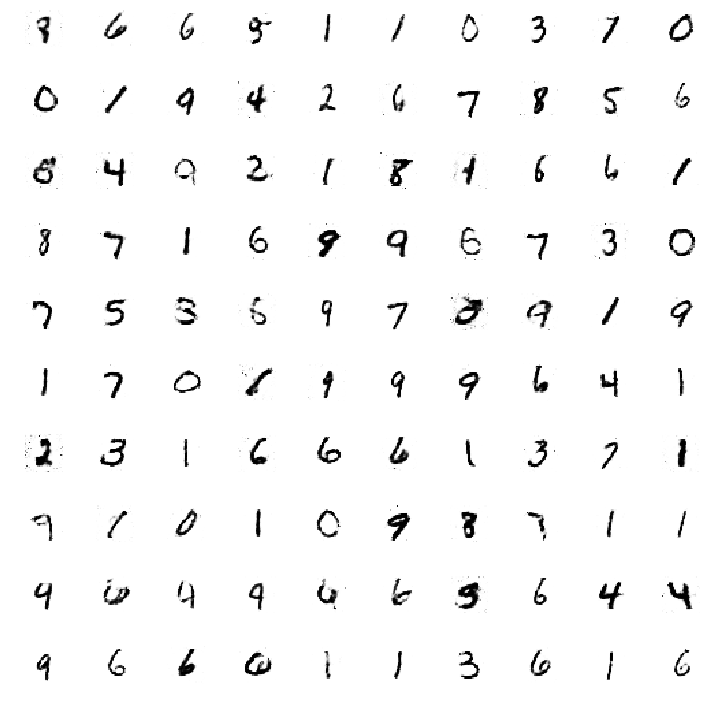

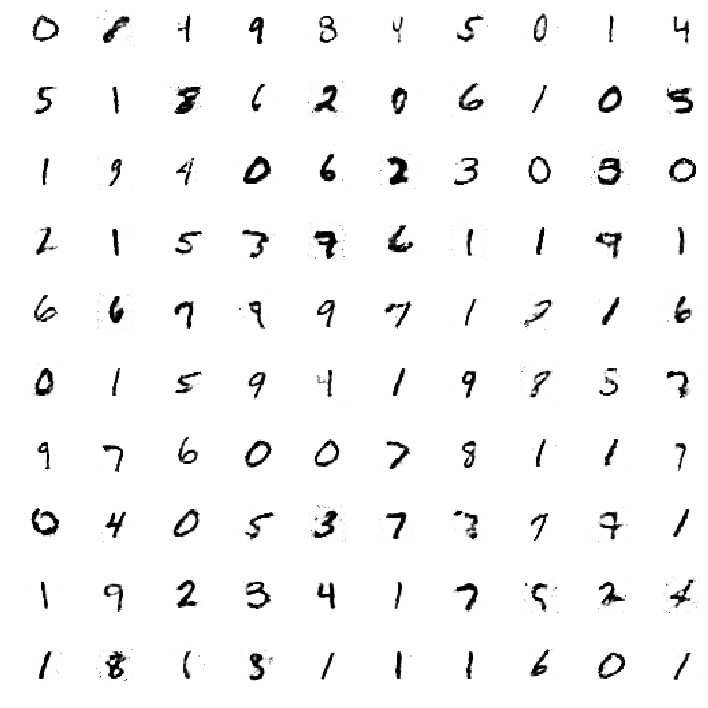

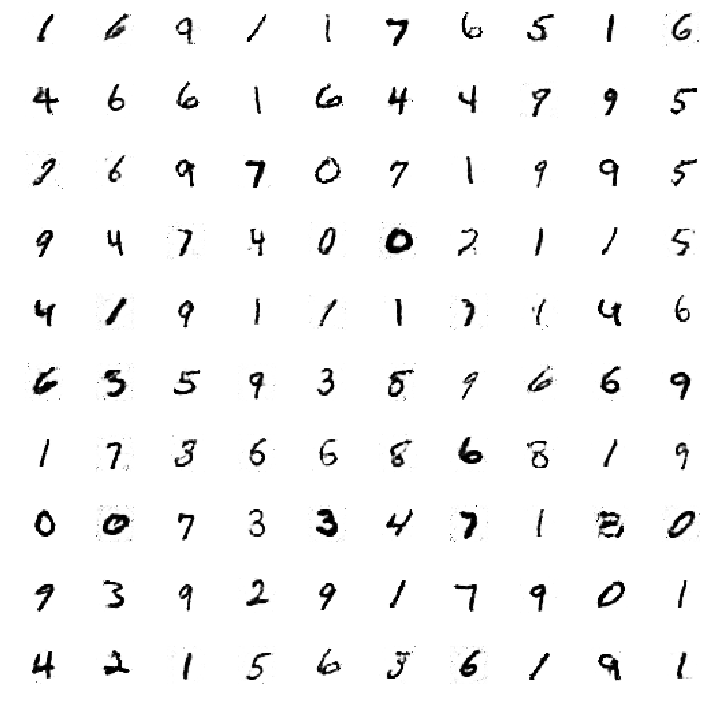

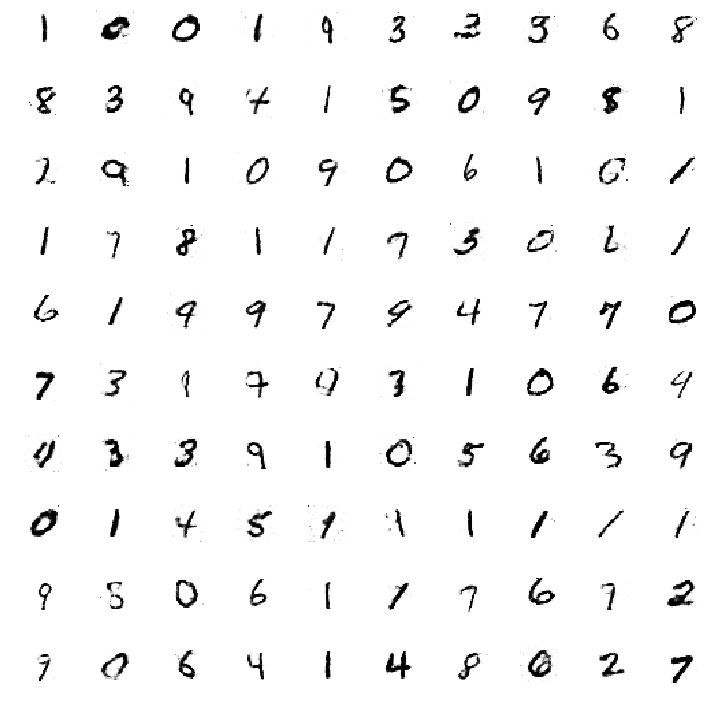

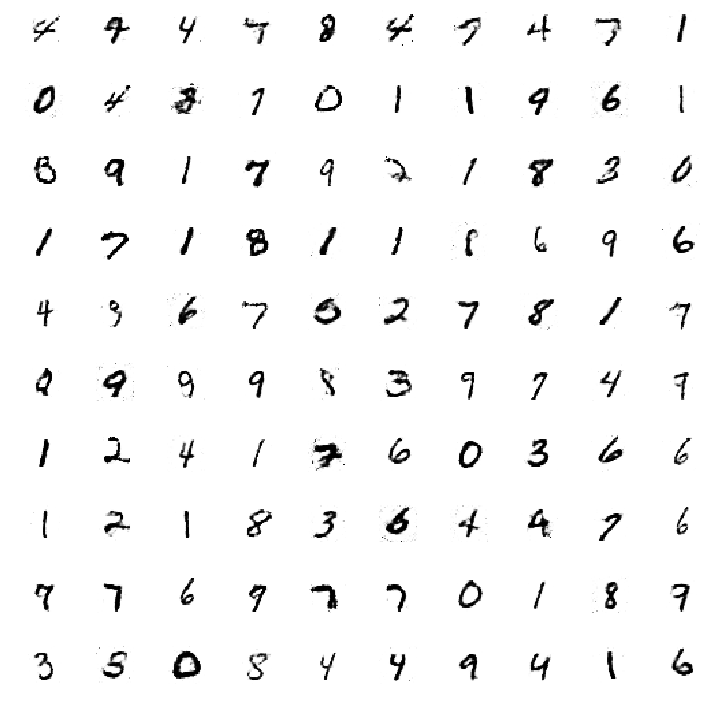

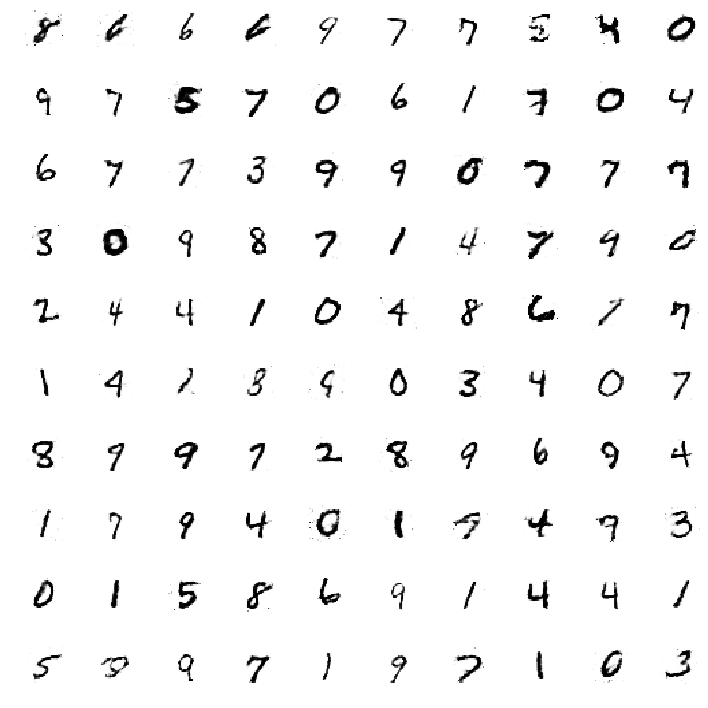

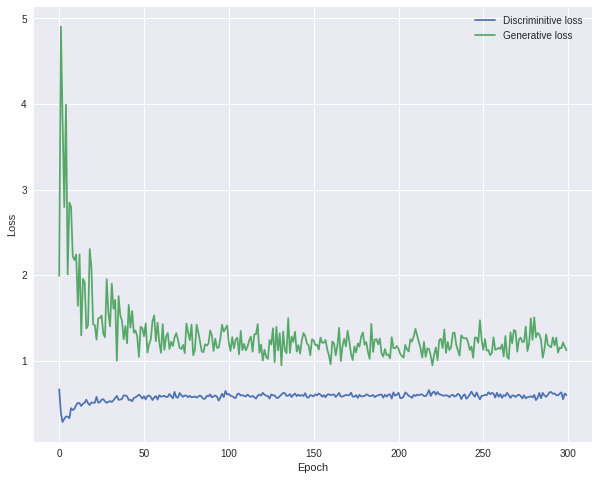

In [20]:
# Liste des Coûts du Discriminateur (un par epoch)
dLosses = []

# Liste des Coûts du Discriminateur (un par epoch)
gLosses = []

def train(epochs=1, batchSize=128):
  
    batchCount = X_train.shape[0] / batchSize
    
    # Affichage des paramètres de train
    print 'Epochs:', epochs
    print 'Batch size:', batchSize
    print 'Batches per epoch:', batchCount

    # ENTRAINEMENT
    
    # Pour chaque epoch
    for e in xrange(1, epochs+1):
      
        # Affichage du numéro de l'epoch
        print '-'*15, 'Epoch %d' % e, '-'*15
        
        # Pour chaque batch
        for _ in tqdm(xrange(batchCount)):
            # On génère des données random de la bonne taille pour générer <batchSize> fausses images 
            noise = np.random.normal(0, 1, size=[batchSize, randomDim])
            imageBatch = X_train[np.random.randint(0, X_train.shape[0], size=batchSize)]

            # On génère des fausses images à partir du bruit généré
            generatedImages = generator.predict(noise)
            X = np.concatenate([imageBatch, generatedImages])

            # J'ai pas trop compris ça, j'admets
            yDis = np.zeros(2*batchSize)
            yDis[:batchSize] = 0.9

            # Entrainement du Discriminateur
            discriminator.trainable = True
            dloss = discriminator.train_on_batch(X, yDis)

            # Entrainement du Générateur, le Discriminateur étant immuable
            noise = np.random.normal(0, 1, size=[batchSize, randomDim])
            yGen = np.ones(batchSize)
            discriminator.trainable = False
            gloss = gan.train_on_batch(noise, yGen)

        # Enregistrement des Coûts pour cette epoch
        dLosses.append(dloss)
        gLosses.append(gloss)

        # On enregistre les données relatives à l'entrainement régulièrement
        if e == 1 or e % 20 == 0:
            plotGeneratedImages(e)
            saveModels(e)

    # Affichage des coûts en fonction de l'epoch
    plotLoss(e)
    
iterations = 300
batchSize = 128

# C'est parti !
train(iterations, batchSize)

# Téléchargements

In [0]:
from google.colab import files

for e in xrange(1, 300+1):
    if e == 1 or e % 20 == 0:
        files.download('gan_generated_image_epoch_%d.png' % e)
        files.download('gan_generator_epoch_%d.h5' % e)
        files.download('gan_discriminator_epoch_%d.h5' % e)